# Tasca de web scraping
**Descripció**
Aprèn a realitzar web scraping.

## Nivell 1
### Exercici 1
Realitza web scraping d'una pàgina de la borsa de Madrid (https://www.bolsamadrid.es).

In [51]:
import bs4 

from selenium.webdriver import Safari
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException

import time
from datetime import datetime

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
url = 'https://www.bolsamadrid.es'

In [8]:
driver = Safari()

In [9]:
driver.get(url)

In [10]:
acciones = driver.find_elements_by_xpath('//*[@id="MenuIzq"]/div[1]/div[4]/div/div')


acciones[0].click()

driver.current_url
time.sleep(2)

#### Creem un DataFrame amb BeautifulSoup

In [11]:
soup = bs4.BeautifulSoup(driver.page_source, 'html.parser')

taula = soup.find_all('table')[-1]

columnes = [c.text for c in taula.find_all('th')]
columnes.append('link')

list_files = []
for f in taula.find_all('tr'):
    col = [c.text for c in f.find_all('td')]
    href = f.find('a')
#     print(href)
    if len(col) > 0:
        href = href.get_attribute_list('href')
#         print(url+href[0])
        col.append(url+href[0])
        list_files.append(col)
 


df = pd.DataFrame(list_files, columns=columnes)


In [12]:
df

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora,link
0,ACCIONA,"127,0000","1,03","127,6000","124,8000",86.403,"10.966,44",16/07/2021,Cierre,https://www.bolsamadrid.es/esp/aspx/Empresas/F...
1,ACERINOX,"10,3400","-0,86","10,5500","10,2500",750.649,"7.799,01",16/07/2021,Cierre,https://www.bolsamadrid.es/esp/aspx/Empresas/F...
2,ACS,"21,5100","-0,32","21,9300","21,2400",616.336,"13.270,21",16/07/2021,Cierre,https://www.bolsamadrid.es/esp/aspx/Empresas/F...
3,AENA,"133,8500","1,86","134,2000","131,8000",115.082,"15.364,30",16/07/2021,Cierre,https://www.bolsamadrid.es/esp/aspx/Empresas/F...
4,ALMIRALL,"14,3200","-1,51","14,5700","14,2000",330.089,"4.734,87",16/07/2021,Cierre,https://www.bolsamadrid.es/esp/aspx/Empresas/F...
5,AMADEUS,"55,0600","0,77","56,2600","54,4000",1.074.027,"59.308,79",16/07/2021,Cierre,https://www.bolsamadrid.es/esp/aspx/Empresas/F...
6,ARCELORMIT.,"25,4750","-3,54","26,5600","25,1500",544.549,"13.944,65",16/07/2021,Cierre,https://www.bolsamadrid.es/esp/aspx/Empresas/F...
7,B.SANTANDER,"3,0380","-2,66","3,1550","3,0080",33.908.748,"103.701,10",16/07/2021,Cierre,https://www.bolsamadrid.es/esp/aspx/Empresas/F...
8,BA.SABADELL,"0,5272","-4,04","0,5570","0,5228",26.907.100,"14.312,30",16/07/2021,Cierre,https://www.bolsamadrid.es/esp/aspx/Empresas/F...
9,BANKINTER,"4,2130","-1,66","4,3550","4,2000",2.172.924,"9.211,32",16/07/2021,Cierre,https://www.bolsamadrid.es/esp/aspx/Empresas/F...


#### Utilitzem pandas per llegir taules

In [13]:
valor = 'VISCOFAN'
df.loc[df.Nombre == valor, 'link']

34    https://www.bolsamadrid.es/esp/aspx/Empresas/F...
Name: link, dtype: object

In [47]:
def company_data(link):
    return pd.read_html(link, flavor='bs4')[-3]

tempdf = company_data(df.query('Nombre == @valor').link.values[0])

In [48]:
tempdf.drop(index=0, inplace=True)

In [49]:
tempdf.columns = ['indicador', *tempdf.columns[1:]]

In [50]:
tempdf.melt(id_vars=['indicador'])

,indicador,variable,value
0,Capitalización *(Miles de Euros),2021 hasta el 16/07,2.652.825
1,Nº de acciones (x 1.000),2021 hasta el 16/07,46.500
2,Precio cierre período (euros),2021 hasta el 16/07,570500
3,Último precio período (euros),2021 hasta el 16/07,570500
4,Precio máximo período (euros),2021 hasta el 16/07,609000
5,Precio mínimo período (euros),2021 hasta el 16/07,550500
6,Volumen (miles de acciones),2021 hasta el 16/07,11.234
7,Efectivo (miles de euros),2021 hasta el 16/07,653.523
8,Capitalización *(Miles de Euros),2020,2.699.325
9,Nº de acciones (x 1.000),2020,46.500


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nombre              35 non-null     object
 1   Últ.                35 non-null     object
 2   % Dif.              35 non-null     object
 3   Máx.                35 non-null     object
 4   Mín.                35 non-null     object
 5   Volumen             35 non-null     object
 6   Efectivo (miles €)  35 non-null     object
 7   Fecha               35 non-null     object
 8   Hora                35 non-null     object
 9   link                35 non-null     object
dtypes: object(10)
memory usage: 2.9+ KB


## Nivell 2
### Exercici 2
Documenta en un word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.

![bolsa de Madrid](https://www.bolsamadrid.es/images/Base/LogoBMadrid.gif)

### Context
En el context de l'adquisició de dades, hem accedit a la [Bolsa de Madrid](https://bolsamadrid.es). 
Aquí hem anat i adquirit els valors de l'IBEX-35 en el moment d'execució. 

Aquesta taula conté 35 valors. 
Per poder tenir un històric, es poden anar guardant aquests registres i executar l'script cada x temps (per exemple cada 5 minuts) i afegir-ho al dataframe (o, com opció, anar guardant en fitxers amb la data/hora de captura). 

### Contingut

Les dades capturades són: 

- **Nombre**: Nom de la companyia
- **Últ.**: Últim preu 
- **% Dif.**: Diferència sobre la jornada anterior
- **Máx.**: Preu màxim de la sessió
- **Mín.**: Preu mínim de la sessió
- **Volumen**: Volum d'accions negociades
- **Efectivo (miles €)**: Valor de les accions negociades
- **Fecha**: Data de l'últim preu. 
- **Hora**: Hora de l'últim preu. Si Cierre, el mercat està tancat
- **link**: enllaç a la pàgina de dades de la companyia




## Nivell 3
### Exercici 3

Tria una página web que tu vulguis i realitza web scraping mitjançant la llibreria Scrapy. 

In [1]:
# import pandas as pd

import scrapy
from scrapy.crawler import CrawlerProcess

import logging
import pathlib
import re



#### Extraurem dades de la web de [idealista](https://www.idealista.com)

- Extraurem del llistat de vivendes en venta a Barcelona ciutat. 
- Extraurem una sèrie de pàgines (farem requests de les següents pàgines).
- Tot i guardar el link de l'inmoble, no hi entrarem)

In [2]:
class Vivienda(scrapy.Item):
    links = scrapy.Field()
    precio = scrapy.Field()
    precio_ant = scrapy.Field()
    nombre = scrapy.Field()
    desc = scrapy.Field()
    habitaciones = scrapy.Field()
    superficie = scrapy.Field()
    otros = scrapy.Field()

In [3]:
class IdeaSpider(scrapy.Spider):
    name = "idealista"
    start_urls = [
        'https://www.idealista.com/venta-viviendas/barcelona-barcelona/',
    ]
    
    # definim els settings
    custom_settings = {
        'LOG_LEVEL': logging.WARNING,
        'CLOSESPIDER_PAGECOUNT': 30,  #número de pàgines a capturar
        'DOWNLOAD_DELAY' : 15, #temps d'espera entre requests
        'FEEDS': {
                    'venta_viviendas.json': {
                        'format': 'json',
                        'encoding': 'utf8',
                        'store_empty': False,
                        'fields': None,
                        'indent': 4,
                        'item_export_kwargs': {
                           'export_empty_fields': False,
                        },
                      },                    
                    }
        }

    
    def parse(self, response):
        
        for vivienda in response.xpath('//*[@id="main-content"]/section[1]/article'):
  
            # comprovem que no sigui un anunci
    
            if vivienda.attrib['class'] != 'adv noHover':
                viv = Vivienda()

                viv['links'] = vivienda.xpath('.//div/a/@href').getall()
                viv['precio'] = ''.join(re.findall(r'\d+', vivienda.xpath('.//span [@class="item-price h2-simulated"]/text()').get()))
                if vivienda.xpath('.//span [@class="pricedown_price"]/text()').get():
                    viv['precio_ant'] = ''.join(re.findall(r'\d+', vivienda.xpath('.//span [@class="pricedown_price"]/text()').get()))
                viv['nombre'] = vivienda.xpath('.//div[@class="item-info-container"]/a/@title').get()

                for det, car in zip(vivienda.xpath('.//span [@class="item-detail"]/text()').getall(),
                                    vivienda.xpath('.//span [@class="item-detail"]/small/text()').getall()):
                    if 'hab.' in car:
                        viv['habitaciones'] = int(det)
                    elif 'm²' in car:
                        viv['superficie'] = int(det)
                    else:
                        viv['otros'] = "".join([det, car])

                viv['desc'] = vivienda.xpath('.//div[@class="item-description description"]/p//text()').get().strip().replace("\n", ". ")
                yield viv
            
        # request de la pàgina següent    
        seguent = response.xpath('//*[@id="main-content"]/section[1]/div/ul/li[8]/a/@href')
        if seguent:
            seguent_url = response.urljoin(seguent.get())
            request = scrapy.Request(url=seguent_url, )
            yield request

        


In [4]:
process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})

process.crawl(IdeaSpider)
process.start()

2021-07-17 20:43:07 [scrapy.utils.log] INFO: Scrapy 2.5.0 started (bot: scrapybot)
2021-07-17 20:43:07 [scrapy.utils.log] INFO: Versions: lxml 4.6.3.0, libxml2 2.9.4, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 21.2.0, Python 3.9.6 | packaged by conda-forge | (default, Jul 11 2021, 03:35:11) - [Clang 11.1.0 ], pyOpenSSL 20.0.1 (OpenSSL 1.1.1k  25 Mar 2021), cryptography 3.4.7, Platform macOS-11.4-arm64-arm-64bit
2021-07-17 20:43:07 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2021-07-17 20:43:07 [scrapy.crawler] INFO: Overridden settings:
{'CLOSESPIDER_PAGECOUNT': 3,
 'DOWNLOAD_DELAY': 15,
 'LOG_LEVEL': 30,
 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}


#### Obrim el json generat

In [44]:
dfviv = pd.read_json('../scrapy/venta_viviendas.json',)

In [45]:
dfviv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   link          900 non-null    object 
 1   telf          900 non-null    object 
 2   precio        900 non-null    int64  
 3   precio_ant    139 non-null    float64
 4   nombre        900 non-null    object 
 5   habitaciones  892 non-null    float64
 6   superficie    900 non-null    int64  
 7   otros         862 non-null    object 
 8   desc          900 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 63.4+ KB


In [46]:
dfviv.describe().round(1)

,precio,precio_ant,habitaciones,superficie
count,900.0,139.0,892.0,900.0
mean,738409.1,512592.1,3.3,134.9
std,690388.2,418420.7,1.3,105.1
min,99000.0,129000.0,1.0,28.0
25%,320000.0,257000.0,3.0,78.0
50%,550000.0,425000.0,3.0,109.0
75%,910000.0,647000.0,4.0,158.0
max,7450000.0,3500000.0,13.0,1800.0


Text(0.5, 1.0, 'Relació preu-superficie i num hab. ')

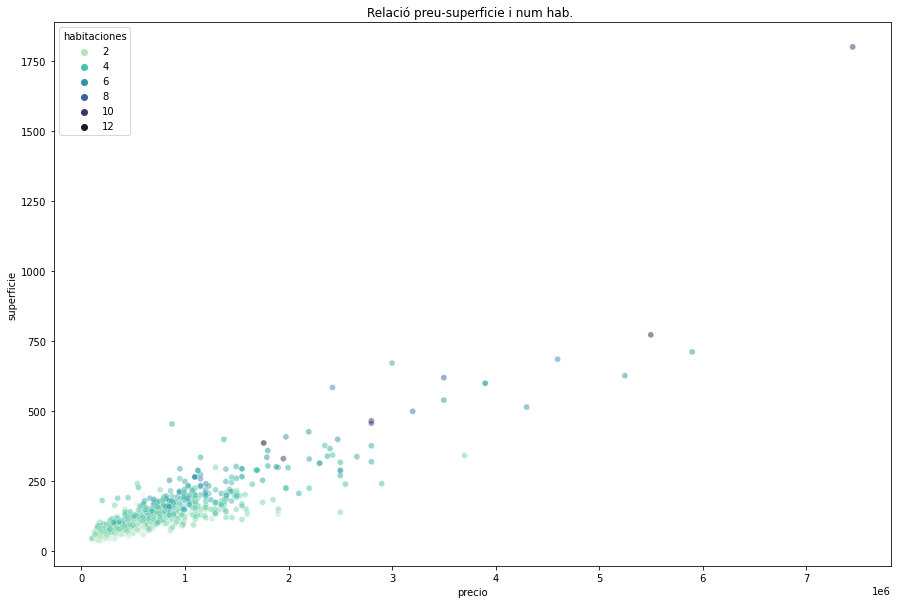

In [66]:
fig = plt.figure(figsize=(15,10))

fig = sns.scatterplot(data=dfviv, x='precio', y='superficie', 
                hue='habitaciones',
                alpha=0.5, palette='mako_r')
fig.set_title('Relació preu-superficie i num hab. ')